In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
f = h5py.File("img_M8_Re900.0_w.h5")

In [3]:
ts = np.array([100, 300, 500, 1000, 1500, 4000])
extent = (0, 2*np.pi, 0, 2*np.pi)

100
300
500
1000
1500
4000


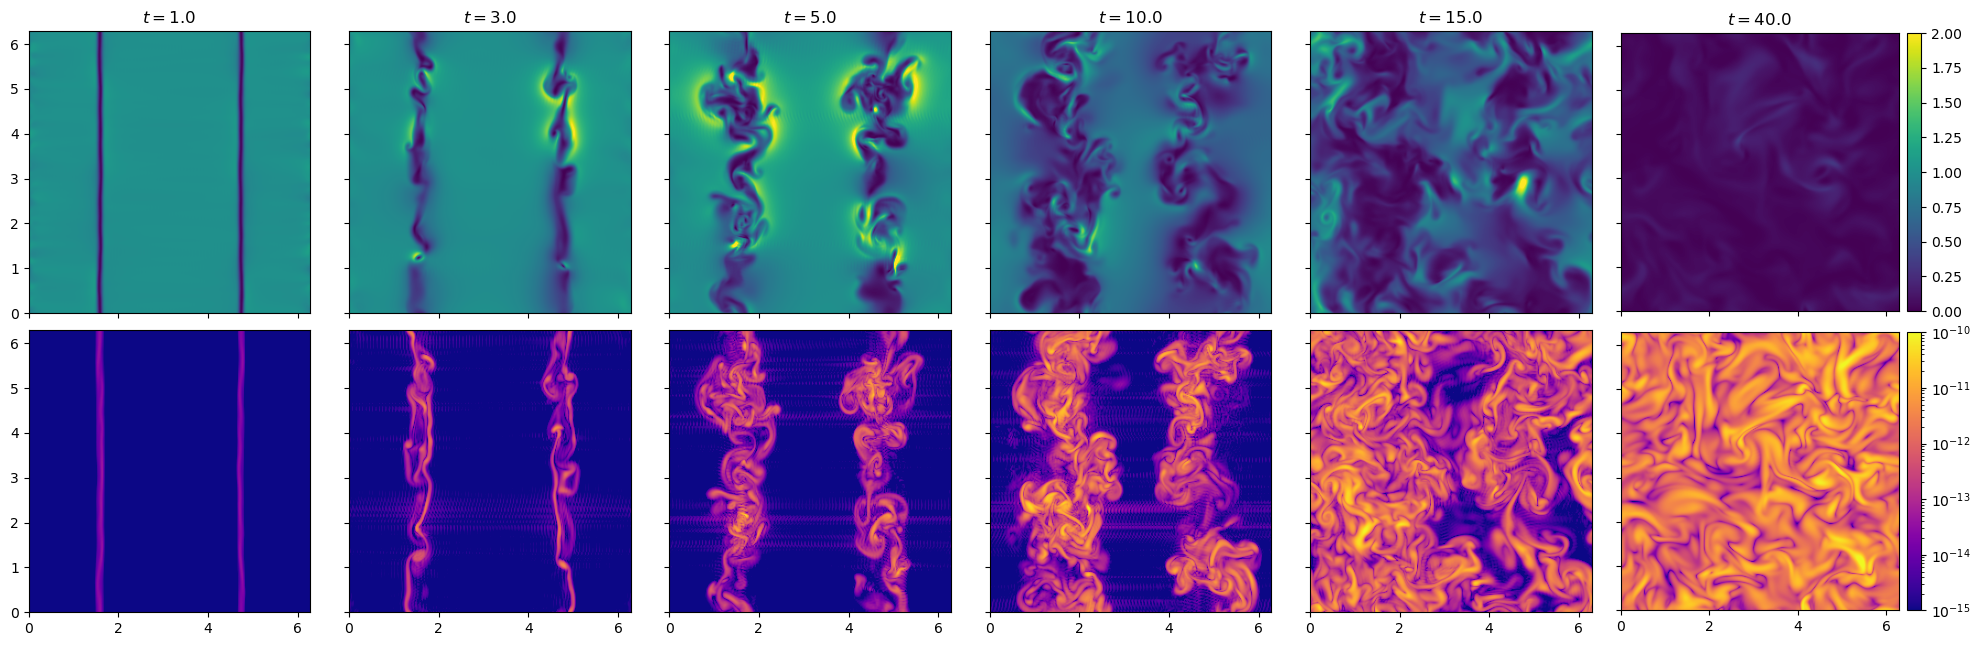

In [19]:
tmin = 500
tmax = 5000
u2min = 0
b2min = 1e-15
u2max = 2
b2max = 1e-10
fig, axs = plt.subplots(nrows=2, ncols=len(ts), figsize=(20, 6.5), sharey=True, sharex=True)
for (i, t) in enumerate(ts):
    print(t)
    u2 = f[f"UB0/3D/{t}"][:]**2 + f[f"UB1/3D/{t}"][:]**2 + f[f"UB2/3D/{t}"][:]**2
    b2 = f[f"UB3/3D/{t}"][:]**2 + f[f"UB4/3D/{t}"][:]**2 + f[f"UB5/3D/{t}"][:]**2
    c1 = axs[0, i].imshow(u2[128, :, :], extent=extent, norm=colors.Normalize(vmin=u2min, vmax=u2max))
    c2 = axs[1, i].imshow(b2[128, :, :], extent=extent, norm=colors.LogNorm(vmin=b2min, vmax=b2max), cmap="plasma")
    axs[0, i].set_title(f"$t={t * 0.01}$")

d1 = make_axes_locatable(axs[0, -1])
d2 = make_axes_locatable(axs[1, -1])
cax1 = d1.append_axes("right", "5%", pad="3%")
cax2 = d2.append_axes("right", "5%", pad="3%")
fig.colorbar(c1, cax=cax1)
fig.colorbar(c2, cax=cax2)
fig.tight_layout()
plt.savefig("images.png")
plt.show()

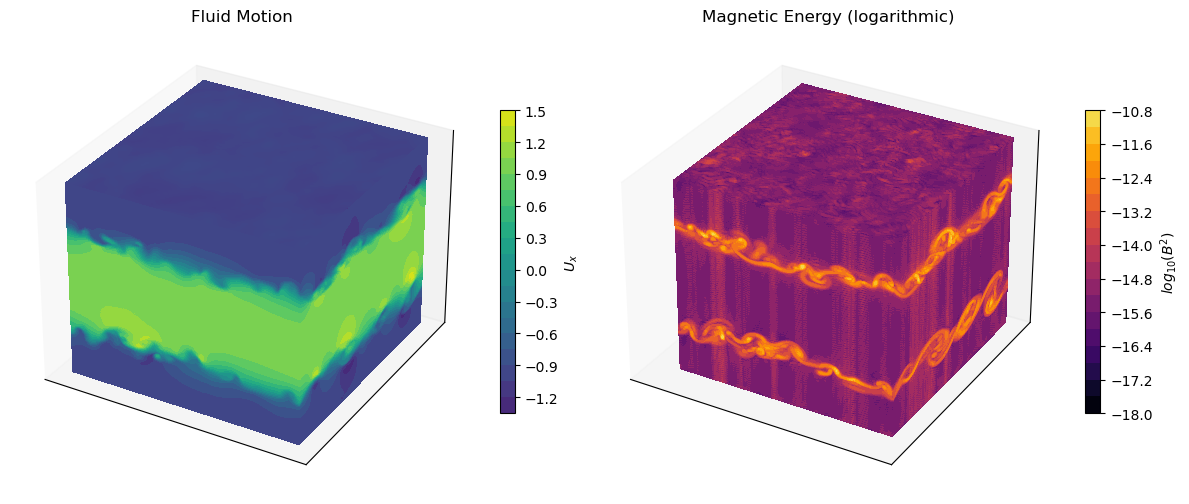

In [20]:
Nx, Ny, Nz = 256, 256, 256
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))
t=400
fig = plt.figure(figsize=(12, 6))

data = f[f"UB0/3D/{t}"][:] #+ f[f"UB1/3D/{t}"][:] + f[f"UB2/3D/{t}"][:]
kw = {'vmin': data.min(),
      'vmax': data.max(),
      'levels': 20} #np.linspace(data.min(), data.max(), 20)}

ax1 = fig.add_subplot(121, projection='3d')
_ = ax1.contourf(X[:, :, 0], Y[:, :, 0], data[:, :, 0], zdir='z', offset=0, **kw)
_ = ax1.contourf(X[0, :, :], data[0, :, :], Z[0, :, :], zdir='y', offset=0, **kw)
C = ax1.contourf(data[:, -1, :], Y[:, -1, :], Z[:, -1, :], zdir='x', offset=X.max(), **kw)
fig.colorbar(C, ax=ax1, fraction=0.03, label="$U_x$")
ax1.set(xticks=[], yticks=[], zticks=[])
ax1.set_title("Fluid Motion")

data = np.log10(f[f"UB3/3D/{t}"][:]**2 + f[f"UB4/3D/{t}"][:]**2 + f[f"UB5/3D/{t}"][:]**2)
data[data < -18] = -18
kw = {'vmin': data.min(),
      'vmax': data.max(),
      'cmap': 'inferno',
      'levels': 20}

ax2 = fig.add_subplot(122, projection='3d')
_ = ax2.contourf(X[:, :, 0], Y[:, :, 0], data[:, :, 0],zdir='z', offset=0, **kw)
_ = ax2.contourf(X[0, :, :], data[0, :, :], Z[0, :, :],zdir='y', offset=0, **kw)
C = ax2.contourf(data[:, -1, :], Y[:, -1, :], Z[:, -1, :],zdir='x', offset=X.max(), **kw)
fig.colorbar(C, ax=ax2, fraction=0.03, label="$log_{10}(B^2)$")
ax2.set_title("Magnetic Energy (logarithmic)")
ax2.set(xticks=[], yticks=[], zticks=[])
plt.savefig("cubes.png")
plt.tight_layout()
plt.show()